# Introduction to Pytorch

It’s a Python based scientific computing package targeted at two sets of audiences:

Tensorial library that uses the power of GPUs
A deep learning research platform that provides maximum flexibility and speed

take a loot here to install pytorch: https://pytorch.org/get-started/locally/

In [ ]:
#!pip install torch torchvision
import torch  # <Ctrl> / <Shift> + <Return>
x = torch.rand(5, 3) 
print(x)

## Getting Help in Jupyter

In [ ]:
torch.sq  # <Tab

In [ ]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor

In [ ]:
torch.nn.Module()  # <Shift>+<Tab>

In [ ]:
# Annotate your functions / classes!
torch.nn.Module?

In [ ]:
torch.nn.Module??

## Dropping to Bash: magic!

In [ ]:
#list of all the files in the directory
!ls -lrt 

In [ ]:
%%bash 
# List all the files but with cleaner outputs for readability
for f in $(ls *.*); do
    echo $(wc -l $f)
done

In [ ]:

# Getting some general help
%magic


## Python native data types
Python has many native datatypes. Here are the important ones:

* **Booleans** are either True or False.
* **Numbers** can be integers (1 and 2), floats (1.1 and 1.2), fractions (1/2 and 2/3), or even complex numbers.
* **Strings** are sequences of Unicode characters, e.g. an html document.
* **Lists** are ordered sequences of values.
* **Tuples** are ordered, immutable sequences of values.
* **Sets** are unordered bags of values.
* **Dictionaries** are unordered bags of key-value pairs.


See [here](https://diveintopython3.net/native-datatypes.html) for a complete overview.

**More resources**
* Brief Python introduction [here](https://learnxinyminutes.com/docs/python3/).
* Full Python tutorial [here](https://docs.python.org/3/tutorial/).
* A Whirlwind Tour of Python [here](https://github.com/jakevdp/WhirlwindTourOfPython).
* Python Data Science Handbook [here](https://github.com/jakevdp/PythonDataScienceHandbook).

## Let's talk about Pytorch!!

In [ ]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

In [ ]:
# Get the size of the tensor
t.size()

In [ ]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))


In [ ]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

In [ ]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

In [ ]:
# This resizes the tensor permanently 
r = torch.Tensor(t)
r.resize_(3, 8)
r

In [ ]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()


In [ ]:
# This *is* important, sigh...
s = r.clone()

In [ ]:
# In-place fill of 1's
s.fill_(1)
s

In [ ]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

# 1-D Tensors

In [ ]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

In [ ]:

# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

In [ ]:

w = torch.Tensor([1, 0, 2, 0])
w

In [ ]:
# Element-wise multiplication
v * w

In [ ]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

In [ ]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

In [ ]:
print(f'first: {x[0]}, last: {x[-1]}')


In [ ]:

# Extract sub-Tensor [from:to)
x[1:2 + 1]

In [ ]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

In [ ]:
# Square all elements in the tensor
print(v.pow(2), v)

In [ ]:
#Bridge with NumPy
#!pip install numpy
import numpy as np

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

## Matrices (2D Tensors)


In [32]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [33]:
m.dim()

2

In [35]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')
# Returns the total number of elements, hence num-el (number of elements)
m.numel()


2 -- 4 -- torch.Size([2, 4])


8

In [36]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [37]:

# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [38]:

# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [39]:
# Indexing column 1, all rows (returns size 2x2)
m[:, [1]]

tensor([[5.],
        [2.]])

In [40]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [41]:
# Scalar product
m @ v

tensor([49., 47.])

In [42]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [43]:
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [44]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.6871, 5.1349, 3.3448, 7.1640],
        [4.1338, 2.2902, 1.9845, 9.6145]])

In [45]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.6545, 4.8883, 2.3946, 6.4985],
        [3.7110, 1.6734, 0.0470, 8.6582]])

In [46]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[1.9173, 1.3026, 0.6910, 1.3847],
        [2.6892, 1.7828, 0.5863, 3.8909]])

In [47]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 2.7764,  8.6033,  3.7763, 16.7706],
        [ 6.0945, 19.3817, 12.2904, 14.5086]])

In [48]:
m.size()


torch.Size([2, 4])

In [49]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()


tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [50]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Constructors

In [51]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [52]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [53]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [54]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [55]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)


tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [56]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [63]:
# Set default plots
from res.plot_lib import set_default
from matplotlib import pyplot as plt
set_default()

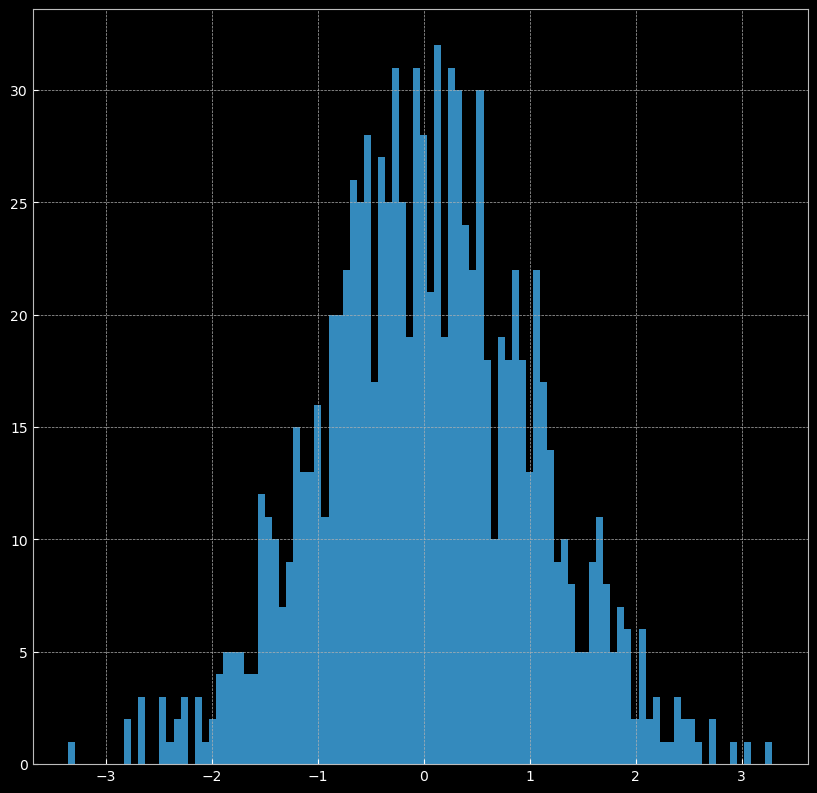

In [64]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

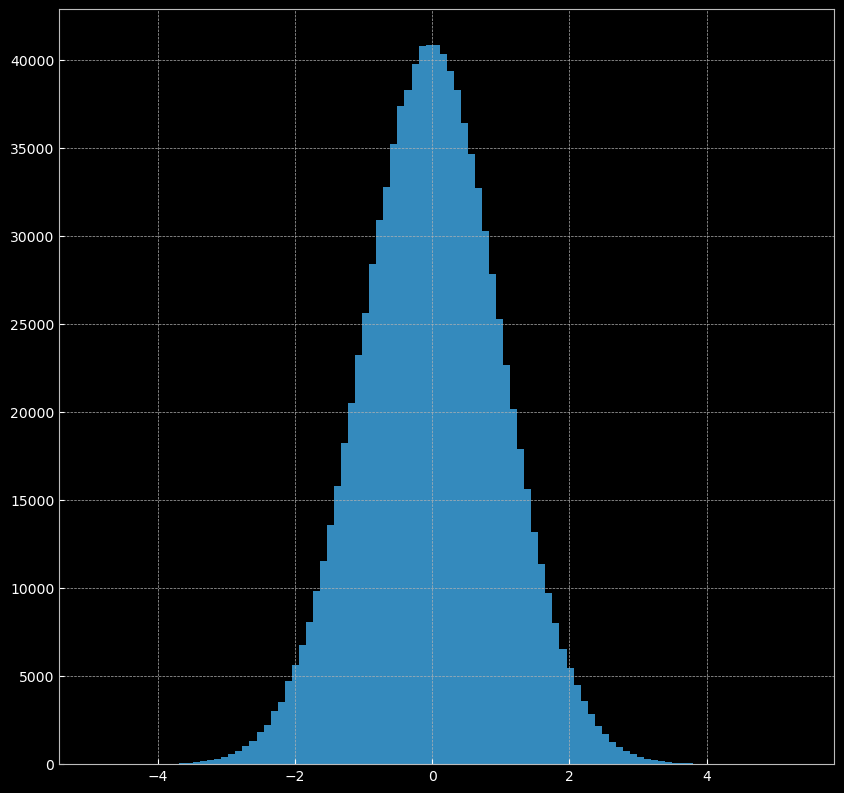

In [65]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

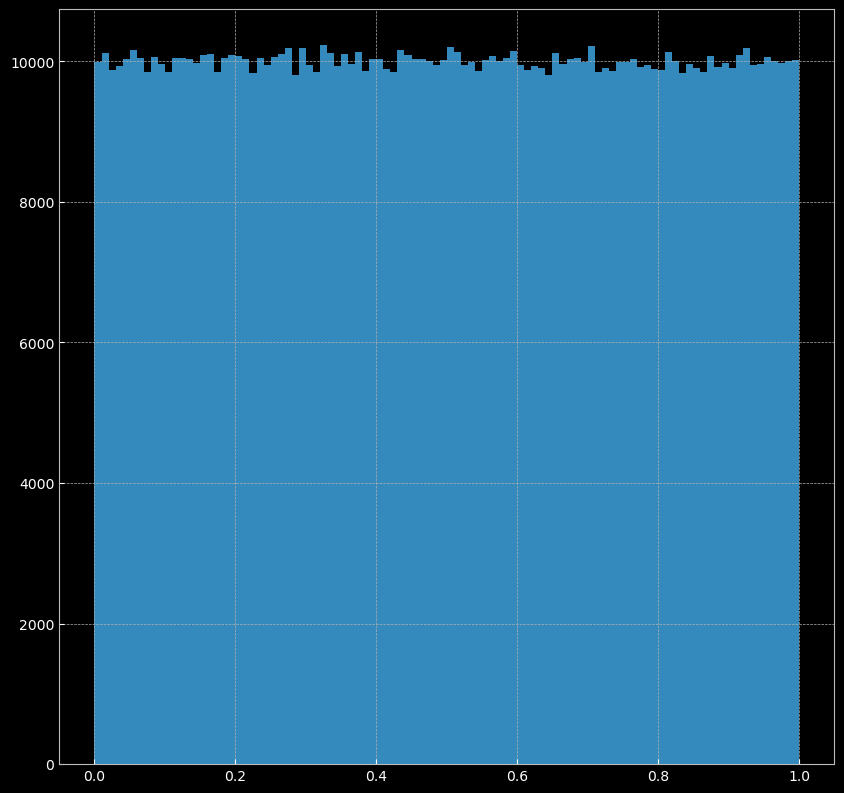

In [66]:
plt.hist(torch.rand(10**6).numpy(), 100);

## Casting

In [67]:
# Helper to get what kind of tensor types
torch.*Tensor?

torch.BFloat16Tensor
torch.BoolTensor
torch.ByteTensor
torch.CharTensor
torch.DoubleTensor
torch.FloatTensor
torch.HalfTensor
torch.IntTensor
torch.LongTensor
torch.ShortTensor
torch.Tensor

In [68]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [69]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [70]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [71]:
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [72]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [73]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [74]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [75]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [76]:
# In-place multiplication of all elements by 2 for tensor n
# Because n is essentiall n_np, not a clone, this affects n_np
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## For you to do!!

In [77]:
# Creates two tensor of size 1x4

# Concatenate on axis 0, so you get 2x4

# Concatenate on axis 1, so you get 1x8

Torch full API should be read at least once. Hence, go [here](https://pytorch.org/docs/stable/index.html).

 You'll find 100+ Tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.